# FX inverse verification

In [1]:
import numpy as np
from frh_fx import mpl, nig, frh, uts, sim, blk
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
mpl.config(scale=1.5,print_keys=False)

In [3]:
T = np.array([1/12,3/12,6/12,1])

In [4]:
σ2,ρ2 = 0.10,-0.5
γ = 1

In [5]:
α2,β2,δ2,μ2 = frh.nig_params(σ2,ρ2,γ)
θ2 = α2,β2,δ2
α0,β0,δ0,μ0 = nig.inverse_params(θ2)
θ0 = α0,β0,δ0

In [6]:
k = uts.get_logstrikes(T)

In [7]:
P0 = nig.price(k,T,θ0)
P2 = nig.price(k,T,θ2)

In [8]:
BS0 = blk.surface(k,T,P0)
BS2 = blk.surface(k,T,P2)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots
Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots
Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots
Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


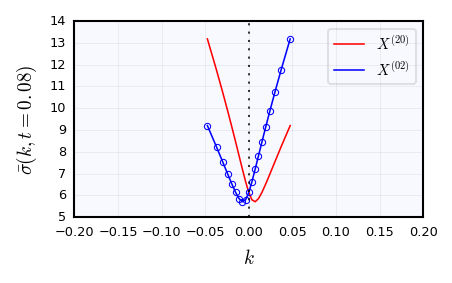

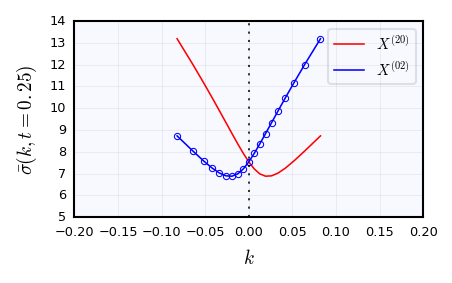

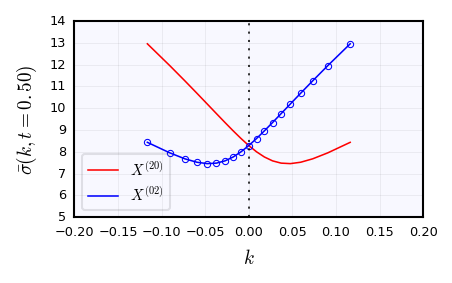

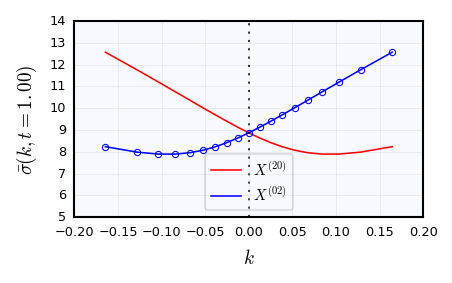

In [9]:
for i in range(len(T)):
    plot,axes = plt.subplots()
    axes.plot( k[i,:],100*BS2[i,:],'r')
    axes.plot( k[i,:],100*BS0[i,:],'b')
    axes.plot(-k[i,:],100*BS2[i,:],'bo')
    axes.plot([0,0],[5,14],'k:')
    axes.legend([r'$X^{(20)}$',
                 r'$X^{(02)}$'])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,t=%.2f)$'%T[i])
    axes.set_xlim([-0.2,0.2])
    uts.save_plot()

In [10]:
uts.save_data(k,T,BS0)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/data/20180522-181453
